In [89]:
import sys
import os
sys.path.append("../")


In [90]:
import requests


## Add document

In [107]:
with open('../data/SP-60.13330.2020.pdf', 'rb') as f:
    resp = requests.put('http://localhost:8005/documents/add/', files={'file': f})

print(resp)
doc_id = resp.json()['documentID']
doc_id


<Response [200]>


'85071fc5910147c2b8cd11e023cbb56c'

In [108]:
resp = requests.get('http://localhost:8005/documents/status/', params={'documentID': doc_id})
print(resp.json())


{'status': 'Processing'}


## Get storage info

In [101]:
resp = requests.get('http://localhost:8005/documents/storage_info/')
print(resp.json())


{'items': [], 'total_documents': 0}


## Search

In [87]:
query = "какие трубопроводы не допускается прокладывать через помещения вентиляционного оборудования?"

resp = requests.post(
    'http://localhost:8005/search/query/',
    json={'query': query},
)
resp.json()


{'query': 'какие трубопроводы не допускается прокладывать через помещения вентиляционного оборудования?',
 'llm_answer': None,
 'results': [{'document_id': '8da2b599076b45e68da3a017b4b5864c',
   'page': 66,
   'text': '10.6  Через  помещение  для  вентиляционного  оборудования  не  допускается  прокладывать трубопроводы:',
   'relevance_score': 0.9125438332557678},
  {'document_id': '8da2b599076b45e68da3a017b4b5864c',
   'page': 77,
   'text': 'Не  допускается  прокладка  магистральных  и  разводящих  трубопроводов  систем  отопления  и внутреннего теплоснабжения через помещения жилых квартир, а также установка в них арматуры и спускных устройств общедомовых систем.',
   'relevance_score': 0.8962804079055786},
  {'document_id': '8da2b599076b45e68da3a017b4b5864c',
   'page': 50,
   'text': '7.10.14  Оборудование  вытяжных  систем  производственных,  административно-бытовых  и общественных  зданий,  удаляющих  воздух  с  резким  или  неприятным  запахом  (из  общественных уборных,  курит

In [88]:
query = "какие трубопроводы не допускается прокладывать через помещения вентиляционного оборудования?"

resp = requests.post(
    'http://localhost:8005/search/query/',
    json={
        'query': query,
        'use_rag': True,
        'context_length': 0
    },
)
resp.json()


{'query': 'какие трубопроводы не допускается прокладывать через помещения вентиляционного оборудования?',
 'llm_answer': '**Ответ:**\n\nЧерез помещения, в которых размещается вентиляционное оборудование, не допускается прокладывать трубопроводы с легковоспламеняющимися и горючими жидкостями и газами, а также канализационные трубопроводы, за исключением:\n\n* трубопроводов ливневой канализации;\n* канализационных трубопроводов, предназначенных для водоотведения из вышележащих помещений, в том числе от вентиляционного оборудования.\n\n**Обоснование:**\n\nДанный запрет на прокладку определённых типов трубопроводов через помещения с вентиляционным оборудованием обусловлен требованиями к обеспечению безопасности и предотвращению возможных аварийных ситуаций. Это требование указано в пункте 10.6 нормативного документа.',
 'results': [{'document_id': '8da2b599076b45e68da3a017b4b5864c',
   'page': 66,
   'text': '10.6  Через  помещение  для  вентиляционного  оборудования  не  допускается  прок

## Get page as image

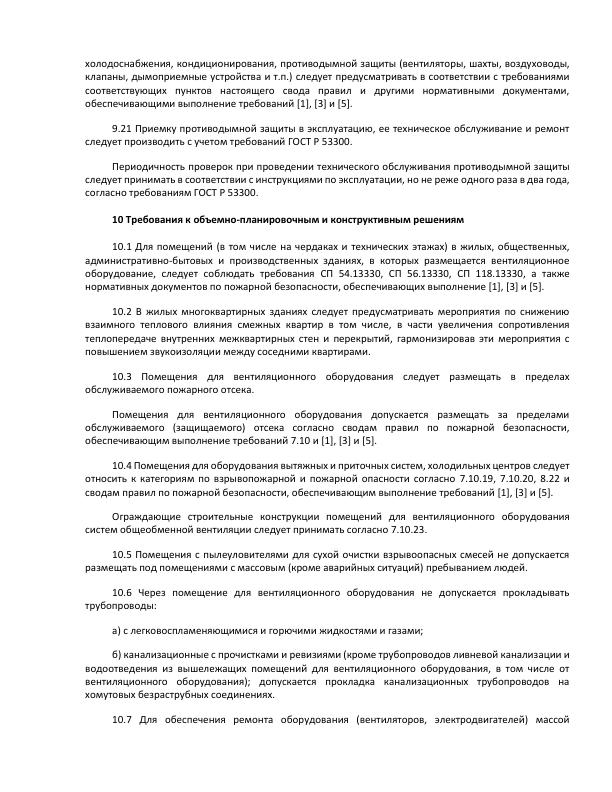

In [110]:
import io
from PIL import Image

resp = requests.get(
    'http://localhost:8005/documents/get_image/',
    json={'document_id': doc_id, 'page': 66}
)
Image.open(io.BytesIO(resp.content))
